In [1]:
# perlu instal pertama kali menggunakan library ini di positron

#!python3 -m pip install wordcloud
#!python3 -m pip install scikit-learn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud


Tutorial extract PDF file dalam satu folder menjadi dataframe dan file pickle (.pkl)
https://youtu.be/GqRvV_r_oJ0?si=x72y4Bh8kT0BZhui

In [3]:
# ambil file pkl jika sudah ada
dataSB= pd.read_pickle("dataarticle.pkl")

# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
dataSB['textdata'] = dataSB['textdata'].str.lower()
print('Case Folding Result : \n')
print(dataSB['textdata'].head(5))

Case Folding Result : 

0    tagedh1transformational and transactional lead...
1    zbw leibniz information centre for economics 2...
2    cogent business management issn: 23311975 (onl...
3    the roles of gamication, knowledge creation, a...
4    application of the extended twostage network d...
Name: textdata, dtype: object


In [4]:
# ------ Tokenizing ---------
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

dataSB['textdata'] = dataSB['textdata'].apply(remove_tweet_special)

In [5]:
#remove number
def remove_number(text):
    return re.sub(r"\d+","", text)

dataSB['textdata'] = dataSB['textdata'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataSB['textdata'] = dataSB['textdata'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dataSB['textdata'] = dataSB['textdata'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataSB['textdata'] = dataSB['textdata'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataSB['textdata'] = dataSB['textdata'].apply(remove_singl_char)

7s

🔍 Top 30 Bigram:
- carbon risk (202)
- green supply (167)
- gdp capita (123)
- plm systems (118)
- corporate social (117)
- environmental performance (99)
- human development (97)
- entrepreneurial orientation (77)
- aisupported leadership (70)
- rm performance (69)
- nonincome hdi (69)
- knowledge creation (67)
- intrapreneurial behaviors (63)
- product lifecycle (63)
- wasted gdp (61)
- economic development (60)
- transformational leadership (59)
- training employees (55)
- credit spreads (55)
- bond credit (53)
- economic growth (53)
- high carbon (50)
- appropriate training (45)
- transactional leadership (44)
- information systems (44)
- organizational support (43)
- international innovation (43)
- feature selection (43)
- bia usage (42)
- leadership style (41)

🔍 Top 20 Trigram:
- high carbon risk (47)
- bond credit spreads (45)
- appropriate training employees (39)
- aisupported appropriate training (35)
- logistics supply chain (34)
- carbon risk issuers (31)
- social responsib

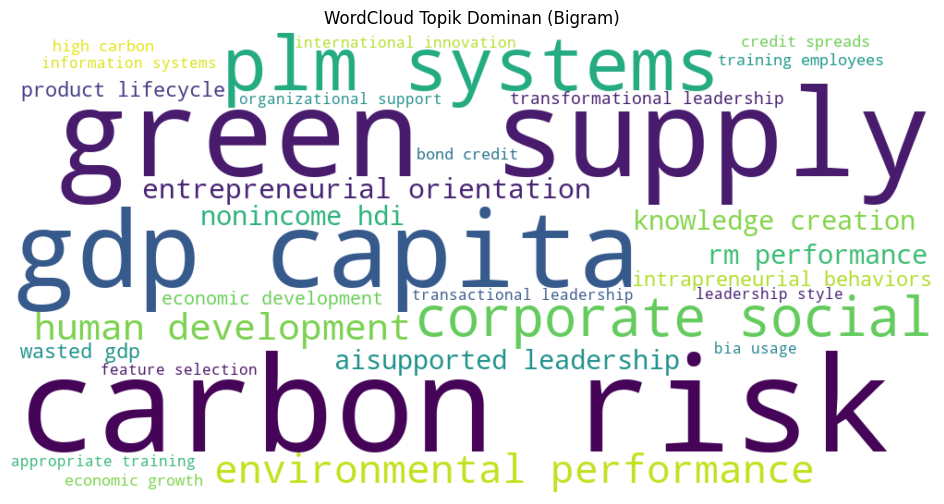

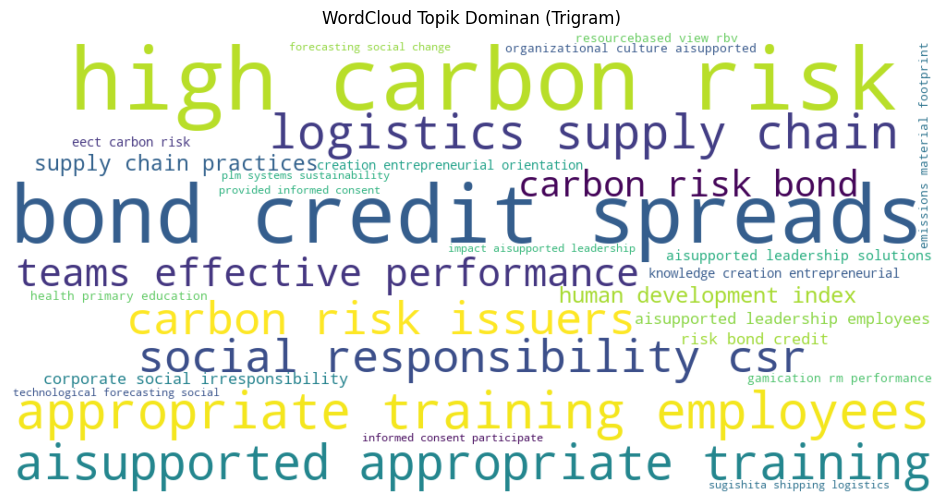

In [ ]:
# --- 1. Gabungkan kalimat jadi teks ---
def safe_join(x):
    if isinstance(x, list):
        return ' '.join([str(i) for i in x if isinstance(i, str)])
    elif isinstance(x, str):
        return x
    else:
        return ''

dataSB['textdata'] = dataSB['textdata'].apply(safe_join)

# --- 2. Pembersihan teks ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

dataSB['text_clean'] = dataSB['textdata'].apply(clean_text)
corpus = dataSB['text_clean'].tolist()

# --- 3. Stopwords tambahan ---
custom_stopwords = {
    # Kata umum, negara, kota, ras, metadata, dan frasa publikasi
    "the", "et", "eu", "this", "paper", "our", "al", "findings", "authors", "analysis", "conclusion",
    "these", "literature", "research", "study", "data", "result",
    "results", "author", "authors", "paper", "studies",
    
    "january", "february", "march", "april", "may", "june", "july", "august", "september", "october", 
    "november", "december",

    "oi", "oh", "uh", "ah", "eh", "ha", "hmm", "huh", "yeah", "yes", "no", "ok", "okay", "klein", "years",
    "annual", "linear", "quarterly", "kong", "journal", "management", "business",
    "doi", "page", "volume", "issue", "pages",  "table", "figure", "fig", "jordanian",

    # Negara dan adjektiva
    "indonesia", "indonesian", "china", "chinese", "japan", "japanese", "malaysia", "malaysian",
    "switzerland", "europe", "european", "khandea", "singapore", "singaporean", "thailand", "thai", "vietnam",
    "vietnamese", "philippines", "filipino", "india", "indian", "pakistan", "pakistani",
    "bangladesh", "bangladeshi", "myanmar", "burmese", "laos", "laotian", "cambodia", "cambodian",
    "brunei", "bruneian", "usa", "american", "canada", "canadian", "mexico",
    "mexican", "brazil", "brazilian", "argentina", "argentinian", "germany", "german", "france",
    "french", "uk", "british", "england", "english", "russia", "russian", "ukraine", "ukrainian",
    "australia", "australian", "zealand", "zealander", "africa", "african", "spanish", "spain", "jordan", 
    "nigeria", "nigerian", "kenya", "kenyan", "egypt", "egyptian", "turkey", "turkish", "iran",
    "iranian", "iraq", "iraqi", "syria", "syrian", 

    # Kota besar
    "paris", "shanghai", "beijing", "tokyo", "delhi", "london", "moscow", "york", "jakarta",
    "bangkok", "manila", "riyadh", "dubai", "doha", "cape", "lagos", "cairo",

    # Ras dan etnis
    "asian", "black", "white", "caucasian", "hispanic", "latino", "latina", "arab", "african",
    "native", "indigenous", "tribal", "ethnic", "minority", "majority"
}

excluded_phrases = {
    #frase bisnis
    "corporate social responsibility",

    "supply chain", "artificial intelligence", "social responsibility", "organizational culture",

    "international journal innovation", "cleaner logistics supply", "innovation studies volume", 
    "studies volume issue", "open access article", "humanities social sciences", 
    "social sciences communications", "international information insights", "squares structural equation", 
    "structural equation modeling", "international journal information", "contents lists available",
    "creative commons attribution", "systematic literature review", "standard errors clustered", 
    "literature review", "wu tian accounting", "united states", "issuers high carbon"
    }

all_stopwords = list(set(text.ENGLISH_STOP_WORDS).union(custom_stopwords))

# --- 4. Fungsi Ekstraksi dan Penyaringan N-Gram ---
def get_clean_ngrams(corpus, ngram_range=(2,2), top_n=30, stopwords=None, excluded_phrases=None):
    
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords)
    X = vectorizer.fit_transform(corpus)

    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# ⬇️ Tambahkan di sini: kata yang harus dibuang meskipun bukan stopwords
    excluded_keywords = {
        "cogent", "article", "httpsdoiorg", "httpsdoiorgsy", "cc",
        "httpsdoiorgjijis", "tambo", "anova", "bany", "kong", "aa",
        "httpwwwemeraldcomejmbearticlepdfejmbepdf", "pp", "campo",
        "httpwwwemeraldcomcemjarticlepdfcemjpdf", "pixel", "byncnd",
        "httpwwwemeraldcomajararticlepdfdoiajarajarenpdf", "vol"
    }

    cleaned = []
    for phrase, freq in words_freq:
        tokens = phrase.split()
        if excluded_phrases and phrase in excluded_phrases:
            continue
        if any(token in stopwords for token in tokens):
            continue
        if any(token in excluded_keywords for token in tokens):
            continue

        cleaned.append((phrase, freq))

    cleaned = sorted(cleaned, key=lambda x: x[1], reverse=True)
    return cleaned[:top_n]

# --- 5. Ekstraksi bigram dan trigram ---
top_bigrams = get_clean_ngrams(corpus, ngram_range=(2,2), top_n=30, stopwords=all_stopwords, excluded_phrases=excluded_phrases)
top_trigrams = get_clean_ngrams(corpus, ngram_range=(3,3), top_n=30, stopwords=all_stopwords, excluded_phrases=excluded_phrases)

# --- 6. Tampilkan hasil ---
print("🔍 Top 30 Bigram:")
for phrase, freq in top_bigrams:
    print(f"- {phrase} ({freq})")

print("\n🔍 Top 20 Trigram:")
for phrase, freq in top_trigrams:
    print(f"- {phrase} ({freq})")

# --- 7. WordCloud visualisasi terpisah ---
def generate_wordcloud(ngrams, title):
    wc_input = {phrase: freq for phrase, freq in ngrams}
    wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(wc_input)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(top_bigrams, "WordCloud Topik Dominan (Bigram)")
generate_wordcloud(top_trigrams, "WordCloud Topik Dominan (Trigram)")
